# Configurações e Arquivos Iniciais

In [14]:
import unidecode
import pickle
import pandas as pd

from pprint import pprint
import matplotlib.pyplot as plt

# Stopwords
from nltk.corpus import stopwords

# Metricas e algoritmos para validacao
from sklearn import model_selection
from sklearn.metrics import accuracy_score, make_scorer

# Text feature extractor
from sklearn.feature_extraction.text import TfidfVectorizer

# Classification models
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [15]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
# Configurações pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_colwidth', 500)

In [17]:
df_tweets_pre = pd.read_json(path_or_buf='outputs/tweets_pre_clas.json', orient='records')
df_tweets_pre = df_tweets_pre[['tweet', 'sentimento_categoria']].copy()
df_tweets_pre.columns = ['tweet', 'sentimento']

In [18]:
df_tweets_pre.head(20)

tweet  \
0       ola, victor! sua duvida e tecnica. por favor, ligue para o nosso service: -762-2237, de segunda a domingo, das h as h.   
1               poxa, a procura por ele e tao grande, que esgotou dos nossos estoques da loja online, mas voce consegue enc...   
2   ian, no momento, estamos analisando a demanda do mercado. continue ligado em nossas redes sociais, sempre divulgamos as...   
3                                                                                                            barraca do beijo!   
4                                         own ... que coisa mais fofinhaa! a gente vai compartilhar com nosso time, ta?! &lt;3   
5                                                                                               boa, igor. aproveite seu nike!   
6                                                                           nao perca a esperanca, miga! ainda tem muito jogo!   
7                                                                                        as indiretas nunca falham. hahahahaha   
8         seu desejo foi ouvido, viu? vem nos fazer uma visiitnha pra conhecer o coffee man! ;) a gente vai adorar te receber!   
9                  hahahaha melhor que pipoca seria oq? aquela mcoferta do mcdonald's junto dessa coca-cola geladinha! ai s...   
10                                                                        nao entendemos sua duvida, no que podemos te ajudar?   
11                    como as emocoes afetam a jogabilidade? dan himmelstein explica pra gente no training room. veja aqui:...   
12      quem e demogorgon na fila do pao? agora o pessoal de hawkins vai conhecer um terror de verdade: uma praca de alimen...   
13                                                                         se eu ja nao aguento mais esperar, imagino voces...   
14                         oi, ! se precisar, ligue no -2237 (seg a dom, das h as h) e converse com nossos tecnicos. obrigado!   
15                                                                                          mimos direto de green gables &lt;3   
16                                                                                                 ai eu sei sim, viu? haha ;)   
17                                                                  a gente acredita nessa virada, ana! pra continuar na copa!   
18                                                                      ja estamos com saudades dessa copa, heitor! foi demais   
19                eita! como assim, leonardo? o produto ainda esta com voce? se sim, manda uma dm pra gente para resolvermo...   

    sentimento  
0            0  
1            1  
2           -1  
3            1  
4            0  
5            1  
6            1  
7            0  
8            1  
9           -1  
10           0  
11           0  
12           0  
13           1  
14           0  
15           0  
16           1  
17           1  
18          -1  
19           0

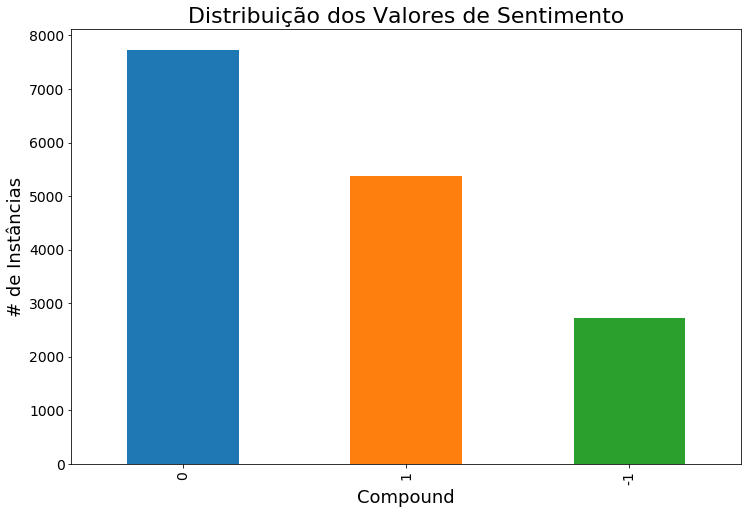

In [19]:
pd.value_counts(df_tweets_pre['sentimento']).plot.bar(figsize=(12, 8))

plt.xticks
plt.xlabel("Compound", fontsize=18)
plt.ylabel("# de Instâncias", fontsize=18)
plt.title("Distribuição dos Valores de Sentimento", fontsize=22)

ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 14)

plt.show()

# Extração de Atributos

In [20]:
tpl_tweets = [tuple(x) for x in df_tweets_pre.values]
X = np.array([x[0] for x in tpl_tweets])
y = np.array([x[1] for x in tpl_tweets])

In [21]:
print(X)
print(y)

['ola, victor! sua duvida e tecnica. por favor, ligue para o nosso service: -762-2237, de segunda a domingo, das h as h.'
 'poxa, a procura por ele e tao grande, que esgotou dos nossos estoques da loja online, mas voce consegue enc...'
 'ian, no momento, estamos analisando a demanda do mercado. continue ligado em nossas redes sociais, sempre divulgamos as...'
 ... 'essa novidade ta demais, ne? se joga nesse amor!'
 'poxa, devido ao sucesso da promocao, muitas lojas em todo o brasil ja estao com os estoques esgotados....'
 'boa tarde! teremos novidades a partir do proximo dia . fique ligado e garanta o seu!']
[ 0  1 -1 ...  1  0  1]


In [22]:
%%time
stop_words = [unidecode.unidecode(x) for x in stopwords.words('portuguese')]

vectorizer = TfidfVectorizer(
    sublinear_tf=True, max_df=0.9, min_df=2, stop_words=stop_words, ngram_range=(1, 3))

X = vectorizer.fit_transform(X)

CPU times: user 686 ms, sys: 28.7 ms, total: 715 ms
Wall time: 707 ms


# Seleção do Melhor Modelo de Classificação

In [23]:
# prepare models
models = []
models.append(('XGB', XGBClassifier()))
models.append(('ABC', AdaBoostClassifier()))
models.append(('BC', BaggingClassifier()))
models.append(('GBC', GradientBoostingClassifier()))
models.append(('RFC', RandomForestClassifier()))
models.append(('ETC', ExtraTreesClassifier()))
models.append(('KNC', KNeighborsClassifier()))
models.append(('MNB', MultinomialNB()))
models.append(('BNB', BernoulliNB()))
# models.append(('GNB', GaussianNB()))
models.append(('SGD', SGDClassifier()))
models.append(('SVC', SVC()))
models.append(('DTC', DecisionTreeClassifier()))

In [24]:
pprint(models)

[('XGB',
  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)),
 ('ABC',
  AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)),
 ('BC',
  BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
         verbose=0, warm_start=False)),
 ('GBC',
  GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_imp

In [25]:
# evaluate each model in turn
results = []
names = []
scoring = make_scorer(accuracy_score)
seed = 29

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring, n_jobs=-1)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

XGB: 0.529843 (0.013179)
ABC: 0.531928 (0.009959)
BC: 0.513674 (0.013265)
GBC: 0.535653 (0.013800)
RFC: 0.525485 (0.012772)
ETC: 0.521316 (0.009883)
KNC: 0.437567 (0.011928)
MNB: 0.569445 (0.012459)
BNB: 0.550748 (0.009607)
SGD: 0.557192 (0.010685)
SVC: 0.488285 (0.011738)
DTC: 0.490179 (0.008995)


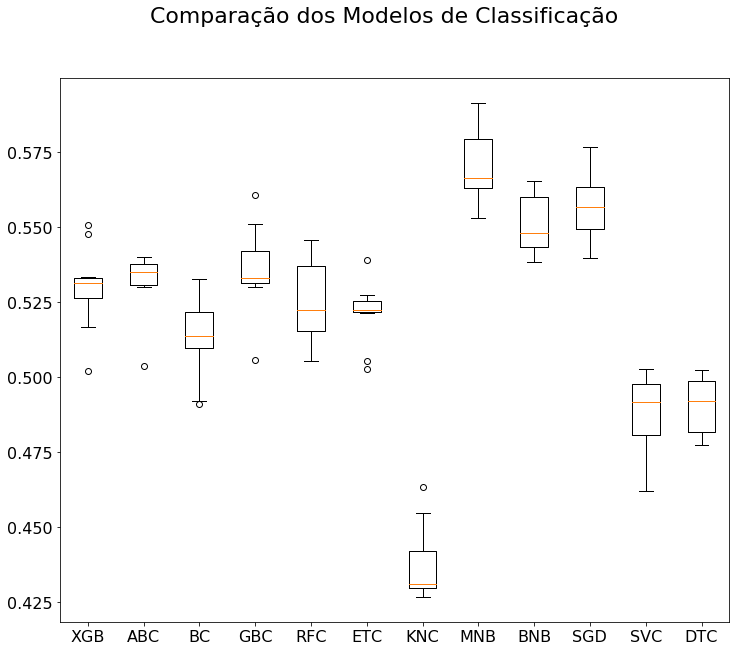

In [26]:
# boxplot algorithm comparison
fig = plt.figure(figsize=(12, 10))
fig.suptitle('Comparação dos Modelos de Classificação', fontsize=22)
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names, fontsize=16)

plt.yticks(fontsize=16)
plt.show()

# Salvando o Melhor Modelo de Classificação

* WIP: Realizar a otimização dos parâmetros do SGDClassifier..

In [10]:
modelo = SGDClassifier()
modelo.fit(X, y)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

A seguir, a matriz esparsa referente aos tweets e o modelo de classificação  são salvos para uso futuro:

In [ ]:
# Salvando a matriz esparsa
filename = 'outputs/tfidf_vec.sav'
pickle.dump(vectorizer, open(filename, 'wb'))

In [48]:
# Salvando o XGBoostRegressor
filename = 'outputs/sgd_classifier.sav'
pickle.dump(modelo, open(filename, 'wb'), protocol=2)